<a href="https://colab.research.google.com/github/JatinSharma222/AI-experiments-Univaersity/blob/main/Experiment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 4
Visualizing scatter plots and correlations between variavbles. Calculating R-Square and adjusted R-Square values for model evaluation


In [34]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = '/content/Automobile_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## Data Cleaning
Convert non-numeric columns to numeric wherever necessary and handle missing values.

In [35]:
# Replace '?' with NaN and convert columns to numeric
data.replace('?', np.nan, inplace=True)

# All numeric columns (including the ones that need conversion)
numeric_columns = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
                  'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
                  'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
                  'highway-mpg', 'price']

# Categorical columns that need encoding
categorical_columns = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
                      'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
                      'fuel-system']

# Convert numeric columns
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    data[col].fillna(data[col].mean(), inplace=True)

# Initialize LabelEncoder
le = LabelEncoder()

# Convert categorical columns using Label Encoding
for col in categorical_columns:
    if col in data.columns:
        # Fill NaN values with 'missing' before encoding
        data[col].fillna('missing', inplace=True)
        data[col] = le.fit_transform(data[col].astype(str))

# Display the data info to verify conversions
print("\nDataset Info after conversion:")
data.info()

# Display summary statistics for numeric columns
print("\nSummary statistics for numeric columns:")
print(data[numeric_columns].describe())

<ipython-input-35-908c077f4003>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
<ipython-input-35-908c077f4003>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us


Dataset Info after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    int64  
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    int64  
 7   drive-wheels       205 non-null    int64  
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    int64  
 15  num-of-cylinders   205 non-null    int64  

## Scatter Plots and Correlations
Visualize relationships between variables using scatter plots and compute their correlations.

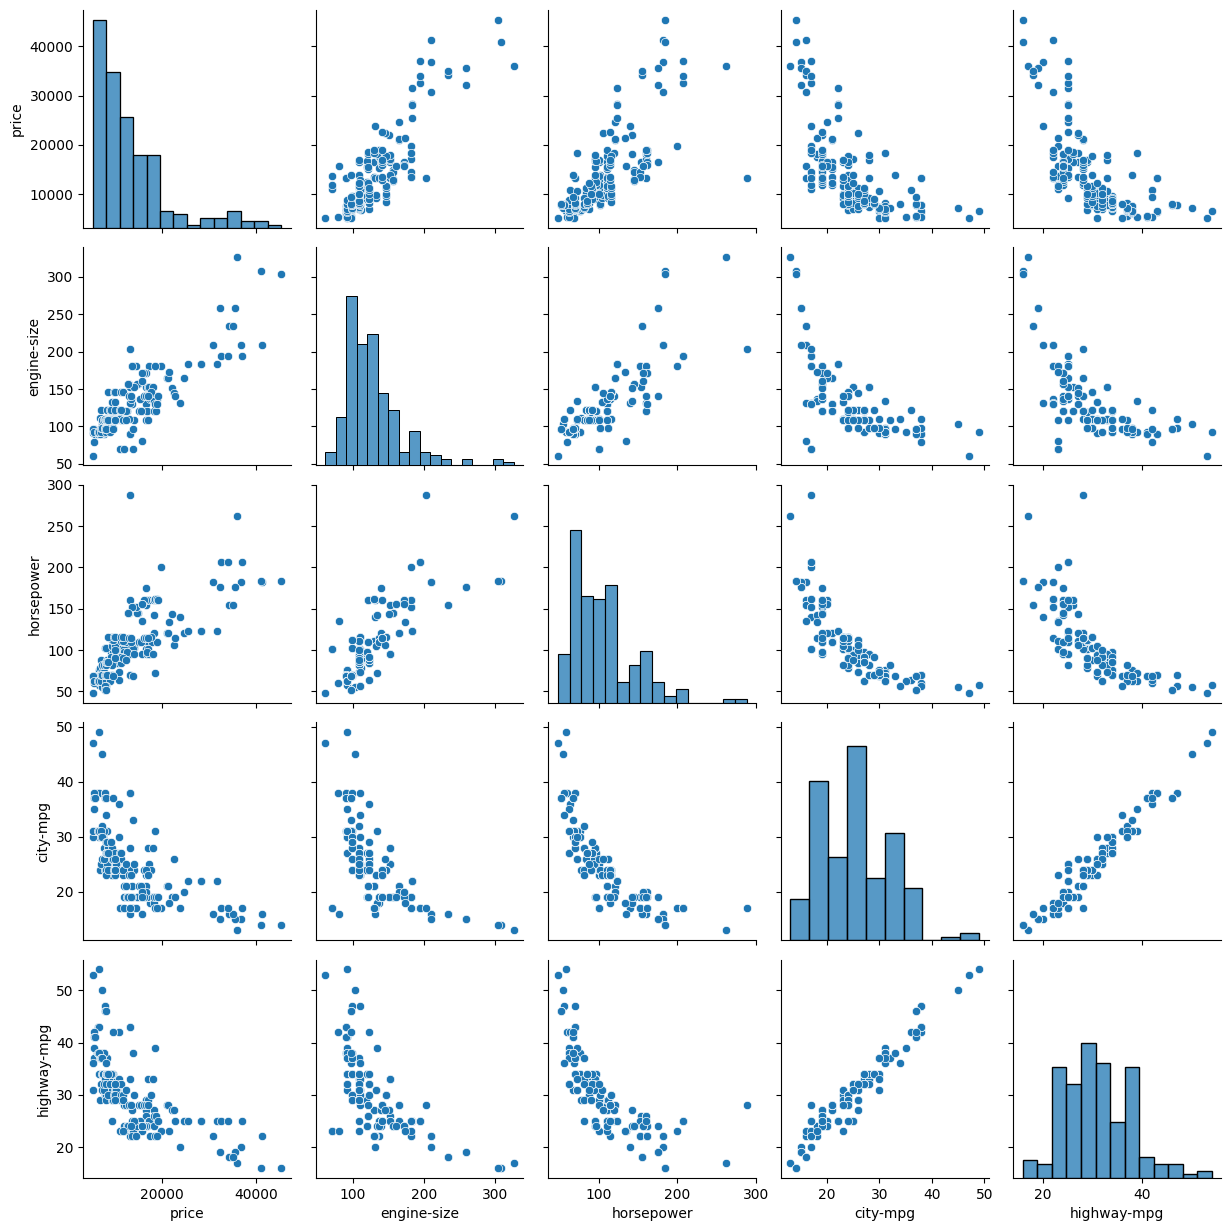

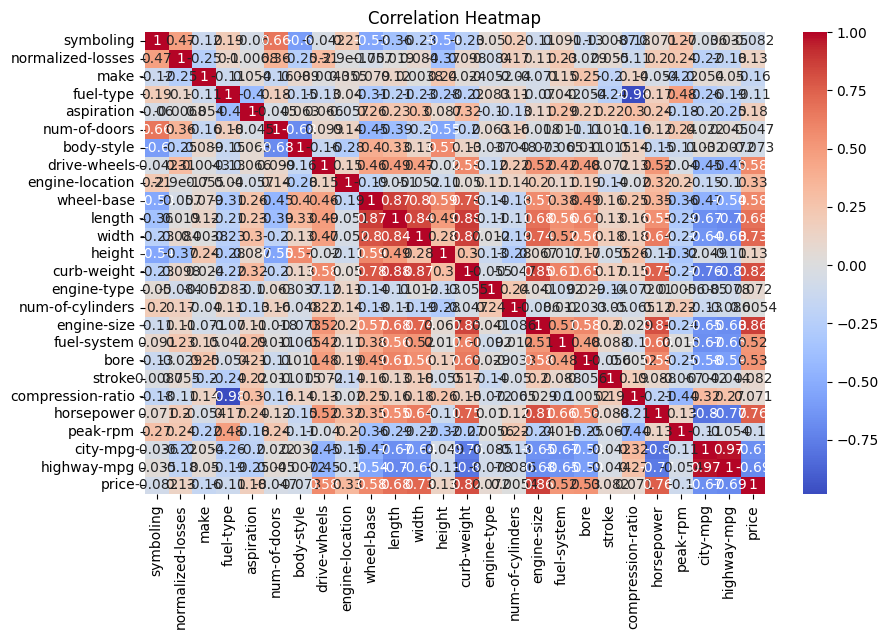

In [36]:
# Scatter plot matrix
# Ensure only numeric columns are used
sns.pairplot(data[['price', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg']])
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
# Calculate correlations and fill NaN with 0
corr_matrix = data.corr().fillna(0)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## R-squared and Adjusted R-squared
Fit a linear regression model to predict `price` based on other features, and compute evaluation metrics.

In [37]:
# Define features (X) and target (y)
X = data[['engine-size', 'horsepower', 'city-mpg', 'highway-mpg']]
y = data['price']

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict and calculate R-squared
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# Calculate Adjusted R-squared
n = X.shape[0]  # number of observations
p = X.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

R-squared: 0.7649210531116438
Adjusted R-squared: 0.7602194741738767
